### Feature Selection Techniques

In [38]:
import pandas as pd
df=pd.read_csv('MSME Data Modified_v1.9_featureEngineered.csv')
df.head()

,sme_sector,bsr_activity_cd,bsr_org_cd,disbursed_amount,asset_cost,ltv,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,sector_name_Services,sme_category_MICRO,sme_category_SMALL,module_id_cdcc,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Not Scored,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very Low Risk
0,2,55101,13,541190,839010,67.94,1,0,0,550000,...,1,1,0,1,1,0,0,0,0,1
1,2,60203,11,441220,641430,70.62,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,1,31901,11,310040,451380,73.11,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2,52101,12,473490,577260,84.88,1,0,60870,60870,...,1,1,0,0,1,0,0,1,0,0
4,2,55301,11,558090,696500,81.84,1,0,1733200,2500000,...,1,1,0,0,0,0,1,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 49 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   sme_sector                                               32191 non-null  int64  
 1   bsr_activity_cd                                          32191 non-null  int64  
 2   bsr_org_cd                                               32191 non-null  int64  
 3   disbursed_amount                                         32191 non-null  int64  
 4   asset_cost                                               32191 non-null  int64  
 5   ltv                                                      32191 non-null  float64
 6   PRI.ACTIVE.ACCTS                                         32191 non-null  int64  
 7   PRI.OVERDUE.ACCTS                                        32191 non-null  int64  
 8   PRI.CURRENT.BALANCE       

#### Univariate Selection

In [40]:
#c = [0,1,2,3,35,44,45]
#X=df.drop(df.columns[c], axis=1)
#y=df['loan_default'].astype(object)
c = [8,14,21,29]
X=df.drop(df.columns[c], axis=1)
#X=df.drop(df.columns[], axis=1)
y=df['loan_default'].astype(object)

In [41]:
X.head()

,sme_sector,bsr_activity_cd,bsr_org_cd,disbursed_amount,asset_cost,ltv,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,sector_name_Services,sme_category_MICRO,sme_category_SMALL,module_id_cdcc,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Not Scored,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very Low Risk
0,2,55101,13,541190,839010,67.94,1,0,550000,550000,...,1,1,0,1,1,0,0,0,0,1
1,2,60203,11,441220,641430,70.62,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,1,31901,11,310040,451380,73.11,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2,52101,12,473490,577260,84.88,1,0,60870,60870,...,1,1,0,0,1,0,0,1,0,0
4,2,55301,11,558090,696500,81.84,1,0,2500000,2500000,...,1,1,0,0,0,0,1,0,0,0


In [42]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: loan_default, dtype: object

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sme_sector,32191.0,1.778572e+00,4.152146e-01,1.00,2.00,2.00,2.00,2.000000e+00
bsr_activity_cd,32191.0,5.375360e+04,2.263727e+04,1101.00,51201.00,52319.00,60203.00,9.999900e+04
bsr_org_cd,32191.0,1.167767e+01,1.277199e+00,1.00,11.00,11.00,12.00,2.500000e+01
disbursed_amount,32191.0,5.151821e+05,1.291278e+05,139900.00,448490.00,513030.00,570130.00,9.905720e+06
asset_cost,32191.0,7.131498e+05,1.917335e+05,370000.00,627000.00,667150.00,730555.00,1.628992e+07
ltv,32191.0,7.560792e+01,1.150451e+01,18.51,69.64,77.68,84.61,9.499000e+01
PRI.ACTIVE.ACCTS,32191.0,1.121214e+00,2.043797e+00,0.00,0.00,0.00,1.00,5.200000e+01
PRI.OVERDUE.ACCTS,32191.0,1.666926e-01,5.759368e-01,0.00,0.00,0.00,0.00,2.300000e+01
PRI.SANCTIONED.AMOUNT,32191.0,2.247365e+06,1.054373e+07,0.00,0.00,0.00,711645.00,5.855300e+08
PRI.DISBURSED.AMOUNT,32191.0,2.229950e+06,1.052448e+07,0.00,0.00,0.00,691335.00,5.855300e+08


In [45]:
df.shape

(32191, 49)

In [54]:
#df['sector_name'].value_counts()
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
#ordered_rank_features=SelectKBest(score_func=chi2,k=20)
#ordered_feature=ordered_rank_features.fit(X,y)

D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [19] are constant.
  UserWarning)
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


<BarContainer object of 45 artists>

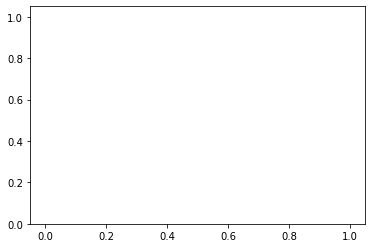

In [56]:
### Apply SelectKBest Algorithm
#Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
X_indices = np.arange(X.shape[-1])
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(f_classif, k=4)
#ordered_feature=ordered_rank_features.fit(X,y)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

In [57]:
from sklearn.feature_selection import SelectKBest, f_classif
ordered_rank_features=SelectKBest(f_classif, k=4)
ordered_feature=ordered_rank_features.fit(X,y)

D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [19] are constant.
  UserWarning)
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [58]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [59]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [60]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,sme_sector,0.082696
1,bsr_activity_cd,0.003793
2,bsr_org_cd,0.076362
3,disbursed_amount,167.771414
4,asset_cost,0.236929
5,ltv,483.194196
6,PRI.ACTIVE.ACCTS,108.099196
7,PRI.OVERDUE.ACCTS,48.576552
8,PRI.SANCTIONED.AMOUNT,48.770461
9,PRI.DISBURSED.AMOUNT,47.357257


In [61]:
features_rank.nlargest(10,'Score')

,Features,Score
5,ltv,483.194196
44,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very ...,254.518240
25,PERFORM_CNS.SCORE,240.649305
3,disbursed_amount,167.771414
42,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Not S...,130.686215
6,PRI.ACTIVE.ACCTS,108.099196
26,Age_of_Customer,61.363191
43,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very ...,60.476066
22,VoterID_flag,55.937090
20,Aadhar_flag,50.019011


##### Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
y=y.astype('int')
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [64]:
print(model.feature_importances_)

[0.00817307 0.04504256 0.04086488 0.06808799 0.0658741  0.07665078
 0.01903834 0.00944033 0.02104268 0.02102694 0.00498327 0.0026509
 0.00162147 0.00261882 0.00255619 0.0228092  0.00241216 0.01583008
 0.00966198 0.         0.00543036 0.00938757 0.00554447 0.00409495
 0.00069594 0.02713689 0.06509125 0.02651635 0.02831759 0.04472192
 0.06323995 0.06011981 0.05797681 0.04379937 0.05305357 0.00807411
 0.00539455 0.00532292 0.01160582 0.01942087 0.00249033 0.00250487
 0.00293632 0.00234691 0.00439081]


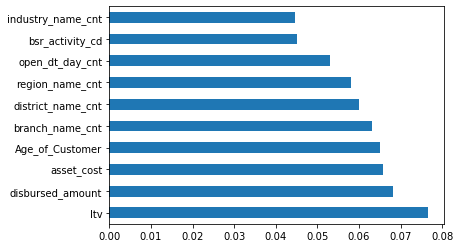

In [65]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation

In [66]:
df.corr()

,sme_sector,bsr_activity_cd,bsr_org_cd,disbursed_amount,asset_cost,ltv,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,sector_name_Services,sme_category_MICRO,sme_category_SMALL,module_id_cdcc,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Not Scored,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very Low Risk
sme_sector,1.000000,0.594592,-0.036761,0.005416,-0.001767,0.012166,0.003368,-0.006082,0.000797,0.001320,...,1.000000,0.026694,-0.019665,-0.073984,-0.001618,-0.000082,0.008530,-0.003911,-0.004005,0.007903
bsr_activity_cd,0.594592,1.000000,-0.057658,0.006219,-0.001498,0.014672,-0.005827,-0.009286,-0.001937,-0.002154,...,0.594592,-0.011830,0.013847,-0.023230,-0.000240,-0.006873,0.004189,0.004903,-0.014009,0.006483
bsr_org_cd,-0.036761,-0.057658,1.000000,0.002115,0.004249,-0.002803,-0.013285,-0.002804,0.003698,0.001905,...,-0.036761,-0.126840,0.127828,0.228188,-0.004222,0.002300,0.002295,-0.003466,0.004298,0.000683
disbursed_amount,0.005416,0.006219,0.002115,1.000000,0.780278,0.366714,0.031683,0.020232,0.002849,0.003894,...,0.005416,0.003508,-0.003930,-0.005778,-0.041603,0.017648,0.006079,-0.006157,0.010059,-0.016131
asset_cost,-0.001767,-0.001498,0.004249,0.780278,1.000000,-0.273103,-0.001667,-0.000775,-0.004681,-0.003218,...,-0.001767,0.005801,-0.004432,-0.005305,0.026869,0.004197,-0.004617,0.023095,-0.008167,-0.022897
ltv,0.012166,0.014672,-0.002803,0.366714,-0.273103,1.000000,0.044720,0.031331,0.005544,0.005043,...,0.012166,-0.005303,0.002567,0.000934,-0.098138,0.019776,0.016456,-0.040806,0.028460,0.006992
PRI.ACTIVE.ACCTS,0.003368,-0.005827,-0.013285,0.031683,-0.001667,0.044720,1.000000,0.380688,0.429841,0.460848,...,0.003368,0.004157,-0.003223,-0.010783,0.016023,0.294425,0.146484,-0.548144,0.162829,0.158205
PRI.OVERDUE.ACCTS,-0.006082,-0.009286,-0.002804,0.020232,-0.000775,0.031331,0.380688,1.000000,0.250473,0.285976,...,-0.006082,-0.004064,0.004986,-0.002543,0.035873,-0.016063,0.056847,-0.298612,0.546603,-0.134825
PRI.CURRENT.BALANCE,0.000797,-0.001937,0.003698,0.002849,-0.004681,0.005544,0.429841,0.250473,1.000000,0.966932,...,0.000797,-0.003540,0.004577,-0.000744,0.025575,0.095518,0.061852,-0.209685,0.060884,0.037460
PRI.SANCTIONED.AMOUNT,0.001320,-0.002154,0.001905,0.003894,-0.003218,0.005043,0.460848,0.285976,0.966932,1.000000,...,0.001320,-0.000751,0.001744,-0.002079,0.027574,0.096810,0.060924,-0.219283,0.068951,0.042046


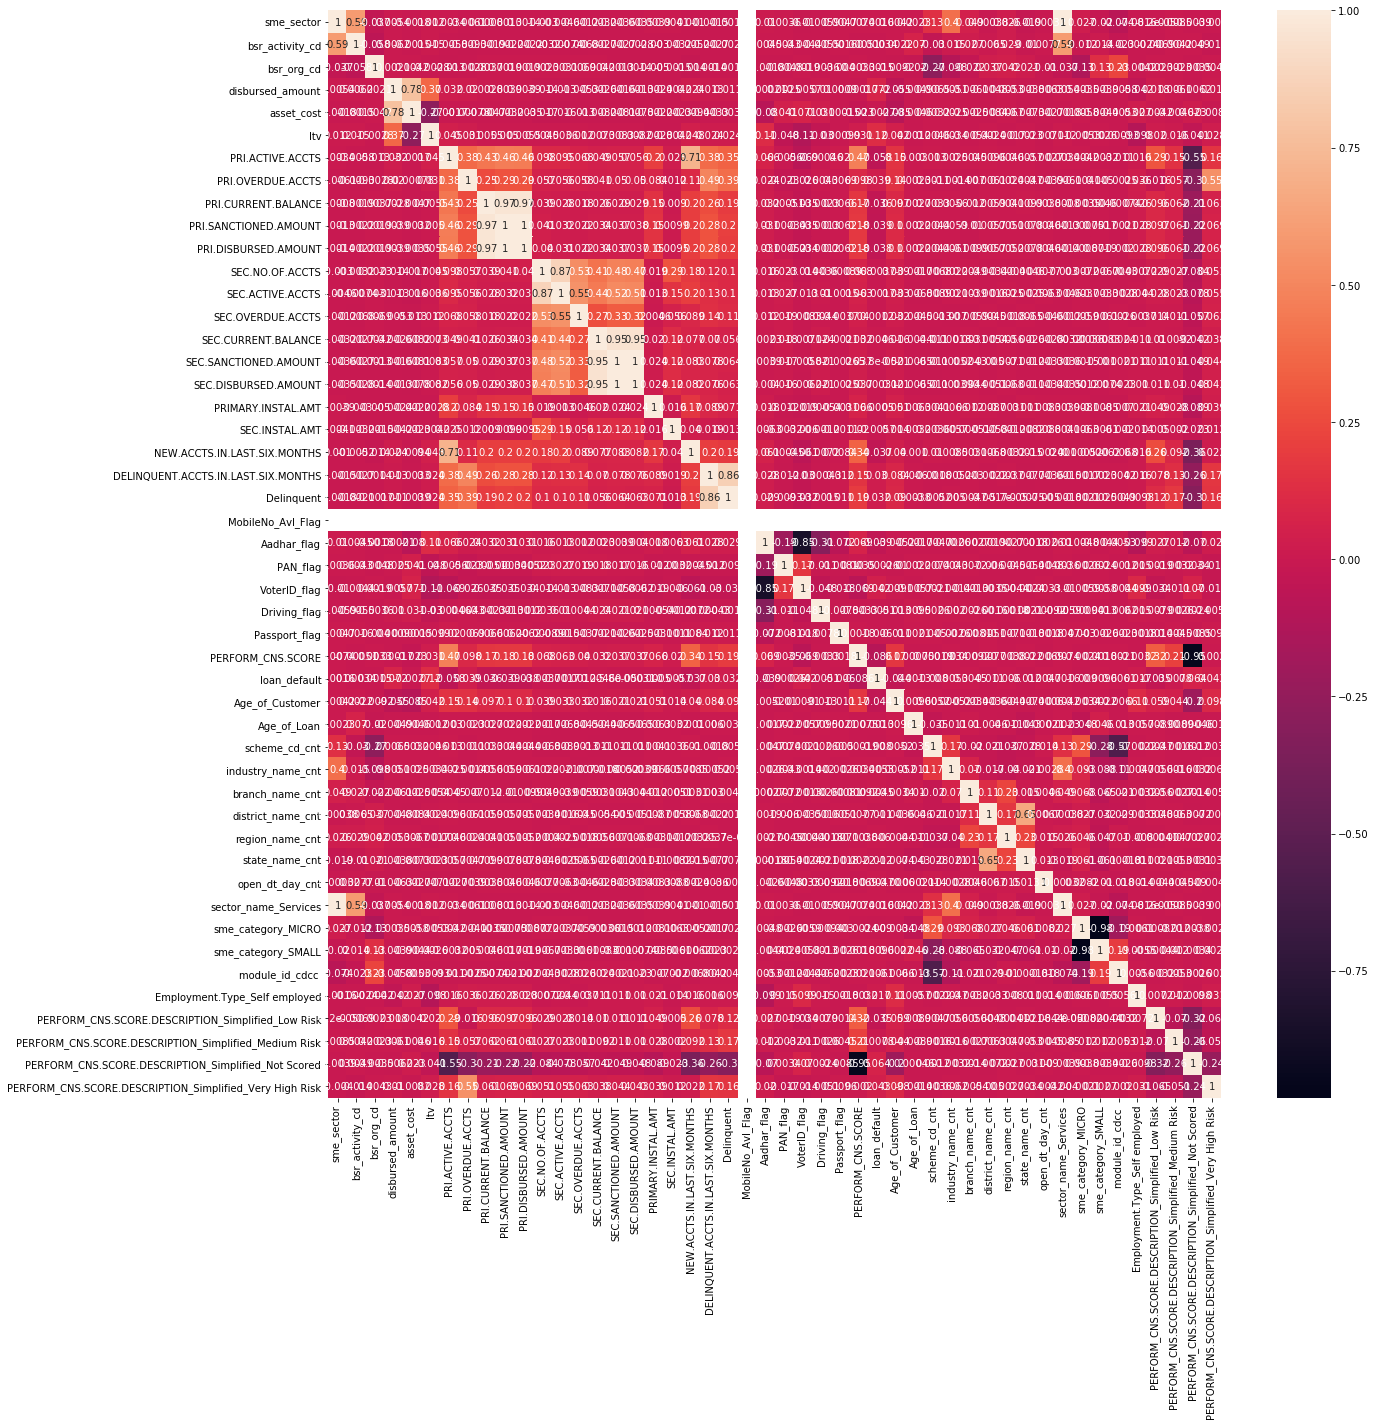

In [67]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)


In [ ]:
#### Remove The correlated

In [68]:
threshold=0.8

In [69]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [70]:
correlation(df.iloc[:,:-29],threshold)

{'PRI.DISBURSED.AMOUNT',
 'PRI.SANCTIONED.AMOUNT',
 'SEC.ACTIVE.ACCTS',
 'SEC.DISBURSED.AMOUNT',
 'SEC.SANCTIONED.AMOUNT'}

#### Information Gain

In [71]:
from sklearn.feature_selection import mutual_info_classif

In [72]:
mutual_info=mutual_info_classif(X,y)

In [73]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)


PERFORM_CNS.SCORE                                          0.011470
ltv                                                        0.009777
disbursed_amount                                           0.008946
asset_cost                                                 0.007696
region_name_cnt                                            0.007200
MobileNo_Avl_Flag                                          0.006198
PRI.SANCTIONED.AMOUNT                                      0.005737
PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Low Risk          0.005502
PRI.DISBURSED.AMOUNT                                       0.005138
Driving_flag                                               0.005050
state_name_cnt                                             0.004994
PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Not Scored        0.004688
PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very Low Risk     0.004331
scheme_cd_cnt                                              0.003896
PRI.ACTIVE.ACCTS                                